## Sample 5.2 Single parameter Bayesian model---Fraction of stars in a sky field

In [4]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 




N_star=28, N_gal=22

First 50 sources: E(theta|y)=0.56
N_star=33, N_gal=17

Second 50 sources: E(theta|y)=0.65
Second 50 sources with the prior from the first 50: E(theta|y)=0.61


Text(0.5, 0, '$\\theta$')

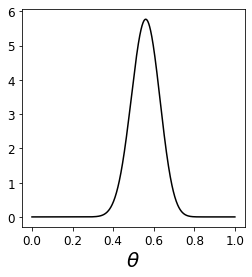

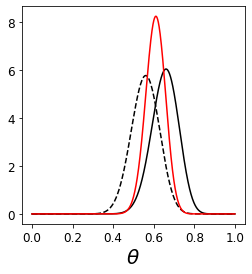

In [2]:
# star/galaxy ratio in a small field of sky
from astropy.table import Table
filename = 'sdss_field.fits'
sdss = Table.read(filename)

#the first 50 data
types = sdss["type"][0:50] #star if type =3, galaxy if type=6
Nstar = np.sum(types==3)
N = 50
print('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)})
E_th_y = (Nstar+1.)/(N+2.)
print(r'First 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y})

#with uniform distribution
theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,Nstar+1,N-Nstar+1)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)
# fig.show()

#with conjugate prior determined by the first 50 and use the 51:100 data
alpha = Nstar+1
beta = N-Nstar+1

types = sdss["type"][50:100]
Nstar2 = np.sum(types==3)
N2 = 50
print('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)})
E_th_y = (Nstar2+1.)/(N2+2.)
print(r'Second 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y})
#uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)
print(r'Second 50 sources with the prior from the first 50: E(theta|y)=%(n).2f' %\
    {'n': (Nstar2+alpha)/np.float(N2+alpha+beta)})
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--')
ax.plot(theta,p2_0,'k-')
ax.plot(theta,p2,'r-')
ax.set_xlabel(r'$\theta$',fontsize=20)
# fig.show()

N_star=363, N_gal=187

550 sources with conjugate prior: theta=0.6594
550 sources: theta=0.6600


Text(0.5, 0, '$\\theta$')

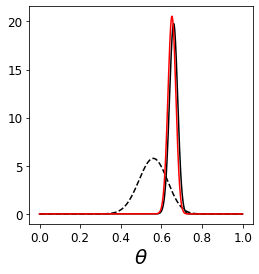

In [3]:
#when data increases prior play less role
alpha = Nstar+1
beta = N-Nstar+1

types = sdss["type"][50:600]
Nstar2 = np.sum(types==3)
N2 = 550
print ('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)})
E_th_y = (Nstar2+1.)/(N2+2.)
print ('550 sources with conjugate prior: theta=%(d1).4f' % {'d1':E_th_y})
print ('550 sources: theta=%(d1).4f' % {'d1':Nstar2/550.})



#uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--')
ax.plot(theta,p2_0,'k-')
ax.plot(theta,p2,'r-')
ax.set_xlabel(r'$\theta$',fontsize=20)
# fig.show()